In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/preprocess_real_final.csv", encoding =  'cp949')
seed = 5764
df = df.dropna()
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.reset_index()
df = df.drop(['index'], axis = 1)
X = df.iloc[:,(df.columns != 'price')]
y = df.price
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(35708, 40) (15304, 40) (35708,) (15304,)


In [ ]:
### Grid Search
model = AdaBoostRegressor()
param = {'n_estimators':[None,10,100,1000],'learning_rate':[0.01,0.1,0.001],'random_state':[5,10,15]}

grid_model = GridSearchCV(model,param_grid = param, cv = 5)
grid_model.fit(train_x, train_y)
print("adaboost 최적 하이퍼 파라미터",grid_model.best_params_)

In [ ]:
model = AdaBoostRegressor(learning_rate = 0.1,
                          n_estimators = 100,
                          random_state = 10 )
model.fit(train_x, train_y)
y_pred = model.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
print("테스트 세트 예측 : {}".format(model.predict(test_x)))
print('AdaBoost 정확도: {:.4f}'.format(model.score(test_x, test_y)))
print(f'MSE : {mean_squared_error(test_y, y_pred) : .4f}')

테스트 세트 예측 : [16946.42711799 10873.74492263 14259.50163953 ... 18298.52558492
  9077.29691767 19115.93520768]
AdaBoost 정확도: 0.7518
MSE :  3158883.3628


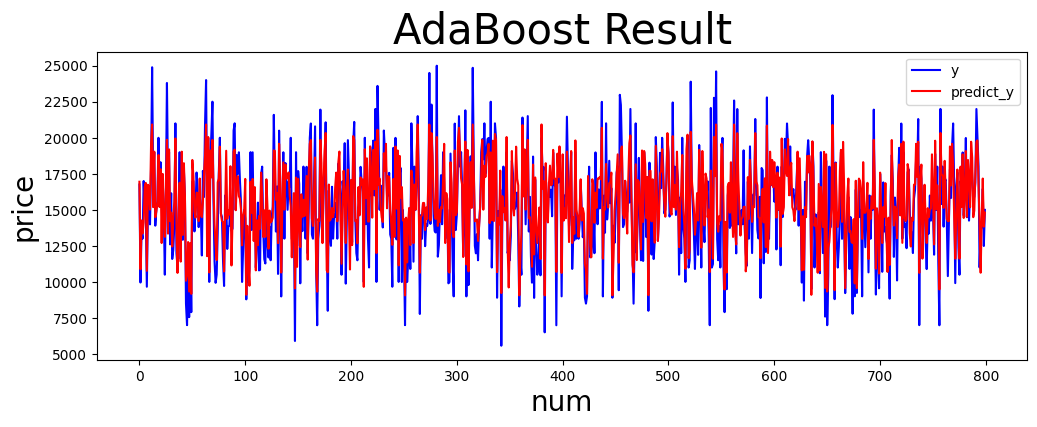

In [ ]:
import matplotlib.pyplot as plt

pre = pd.DataFrame(y_pred)
test_y = test_y.reset_index()
result = pd.concat([test_y, pre], axis = 1)
result.columns = ['a', 'real', 'predict']

fig = plt.figure(figsize = (12,4))
chart = fig.add_subplot(1,1,1)
chart.plot(result.real[:800],  color = 'blue', label = 'y')
chart.plot(result.predict[:800],  color = 'red', label = 'predict_y')
chart.set_title('AdaBoost Result', size=30)
plt.xlabel('num', size = 20)
plt.ylabel('price', size = 20)
plt.legend(loc = 'best')